# Summary

```Objective```

todo

```Methods```

todo

```Results```

todo

# Config

# Libs

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from misalign.data.Kaggle_datamodule import KaggleDataModule
import nibabel as nib
import h5py

def show_img(img):
    plt.figure(dpi=150)
    im = plt.imshow(img, cmap='gray')
    cbar = plt.colorbar(im, shrink=0.5)
    im.set_clim(vmin=0, vmax=1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Analysis

In [ ]:
# Train
# 1~30:     MRI masking,        (4,4)       Good
# 31~120:   MRI masking,        (4,4)       Good
# 121~150:  MRI masking,        (5,6)
# 151~180:  MRI masking,        (4,4)       Good
# 181~210:  MRI, CT masking,    (2,1)
# 211~300:  MRI masking,        (2,50)      So So
# 301~330:  MRI masking,        (3,30)      Good
# 331~360:  MRI, CT masking,    (3,1)
# 361~450:  MRI, CT masking,    (2,10)      CT가 더 큼
# 451~510:  MRI masking,        (2,100)
# 511~540:  MRI, CT masking,    (2,10)      CT가 더 큼
# 541~570:  MRI masking,        (2,100)

# Val
# 1~30:     MRI, CT masking,    (2,10)
# 31~90:    MRI, CT masking,    (2,10)

# Test
# 1~60:     MRI masking,        (2,100)
# 61~90:    MRI, CT masking,    (2,10)      CT가 더 큼
# 91~120:   MRI masking,        (2,70)      So So
# 121~150:  MRI masking,        (2,70)      Good

In [ ]:
import h5py
data_dir = 'C:/Users/NUGURI/Workspace/misalign-benchmark/data/Kaggle/test/data.mat'

with h5py.File(data_dir, "r") as f:
    data_A = np.array(f["data_x"])
    data_B = np.array(f["data_y"])

# create torch tensors
# print(data_A.shape)
data_A = np.transpose(data_A, (2, 1, 0))
# print(data_A.shape)
data_A = np.flipud(data_A)
data_A = np.transpose(data_A, [2,0,1])
# print(data_A.shape)
data_A = np.expand_dims(data_A, axis=0)
print('data_A: ', data_A.shape)

data_B = np.transpose(data_B, (2, 1, 0))
data_B = np.flipud(data_B)
data_B = np.transpose(data_B, [2,0,1])
data_B = np.expand_dims(data_B, axis=0)
print('data_B: ', data_B.shape)

for zz in range(119,122):
    show_img(np.concatenate((data_A[:,zz,:,:].squeeze(), data_B[:,zz,:,:].squeeze()),1))

In [ ]:
from dipy.segment.mask import median_otsu
zz_1 = 121-1
zz_2 = 150
diff = zz_2 - zz_1
tmp_A = data_A[:,zz_1:zz_2,:,:].squeeze()
brain_mask, mask = median_otsu(tmp_A, vol_idx=0, median_radius=2, numpass=70)
MRI_masked = tmp_A.copy()
MRI_masked[~mask] = 0

In [ ]:
for zz in range(0,diff):
    show_img(np.concatenate((mask[zz,:,:].squeeze(), MRI_masked[zz,:,:].squeeze(), data_A[:,zz_1+zz,:,:].squeeze()),1))

In [ ]:
tmp_B = data_B[:,zz_1:zz_2,:,:].squeeze()
CT_masked = tmp_B.copy()
CT_masked[~mask] = 0
for zz in range(0,diff):
    show_img(np.concatenate((mask[zz,:,:].squeeze(), CT_masked[zz,:,:].squeeze(), data_B[:,zz_1+zz,:,:].squeeze()),1))

In [ ]:
# HDF5 파일로 저장하기
hdf5_file_path = 'C:/Users/NUGURI/Workspace/misalign-benchmark/data/Kaggle/test/masked_data_121_150.mat'
with h5py.File(hdf5_file_path, 'w') as file:
    file.create_dataset('data_x', data=MRI_masked)
    file.create_dataset('data_y', data=CT_masked)

print("Data successfully saved as HDF5 file.")

<KeysViewHDF5 ['data_x', 'data_y']>
MRI size: (90, 256, 256)
CT size: (90, 256, 256)


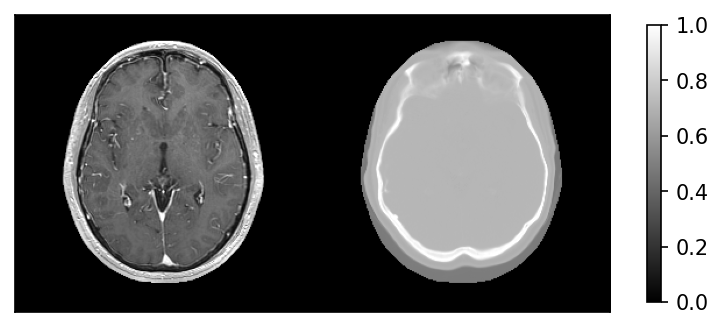

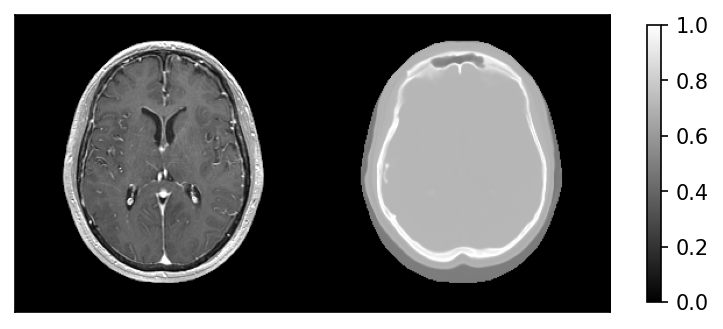

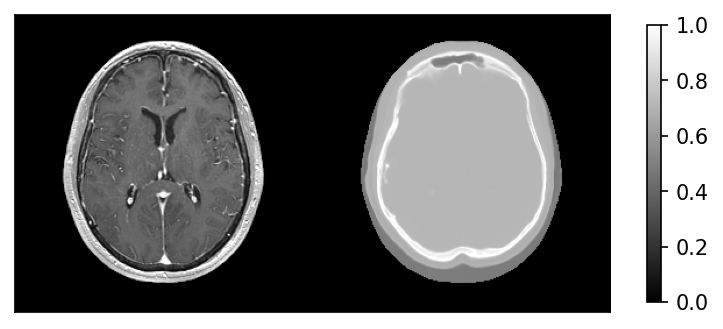

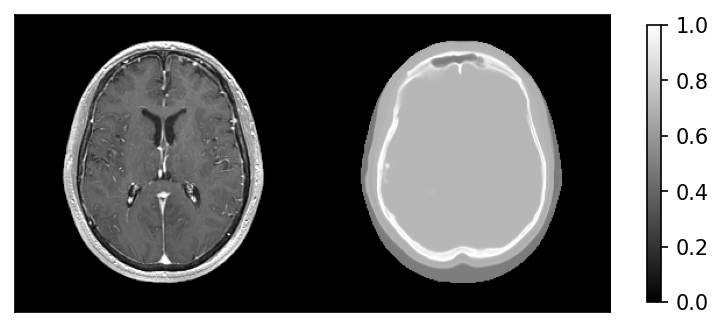

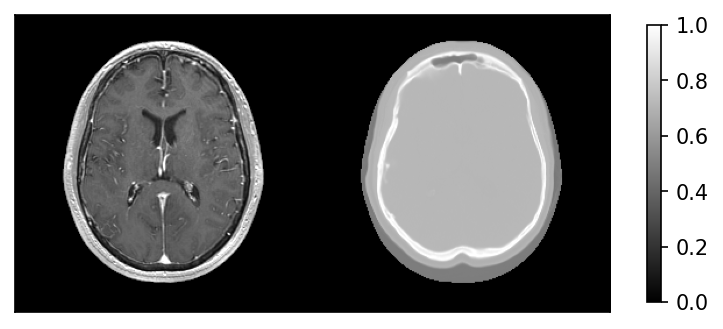

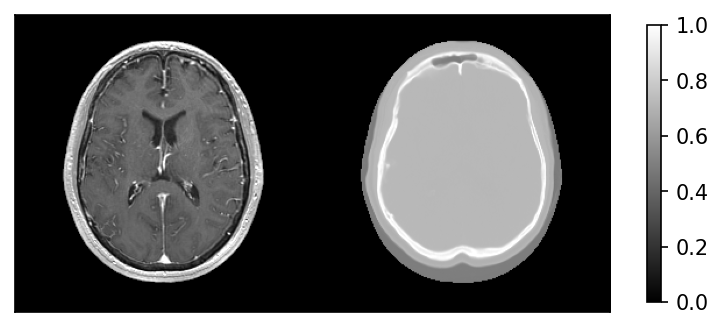

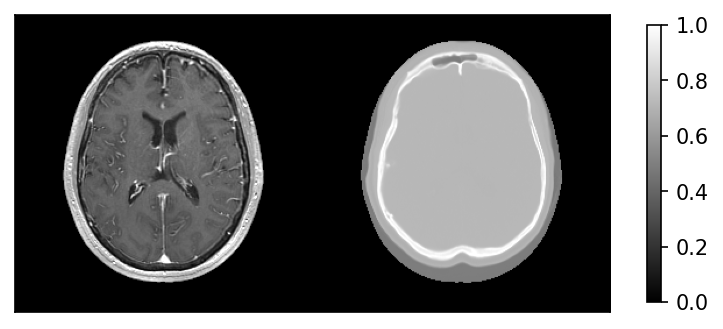

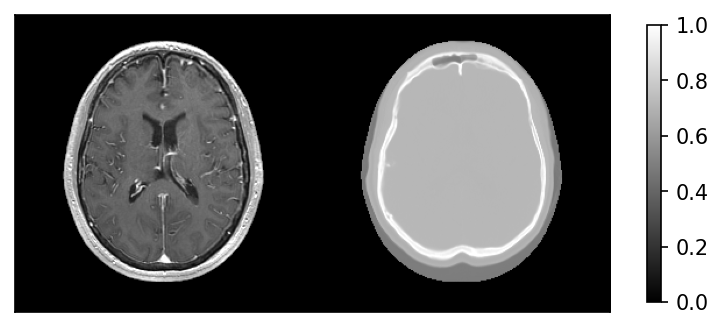

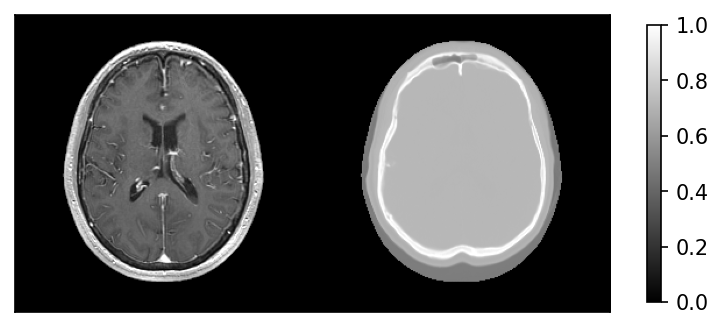

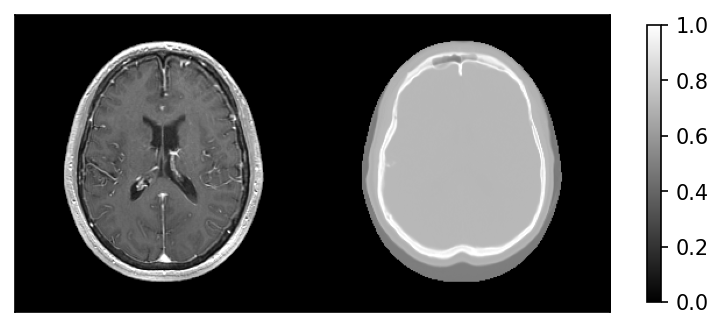

In [6]:
dataroot = 'C:/Users/NUGURI/Workspace/misalign-benchmark/data/Kaggle/train/masking/masked_data_211_300.mat'
mat = h5py.File(dataroot, 'r')
print(mat.keys())

raw_MRI = np.array(mat['data_x'])

raw_CT = np.array(mat['data_y'])

print('MRI size:', raw_MRI.shape)
print('CT size:', raw_CT.shape)
mat.close()

# zz = 50
# show_img(np.concatenate((raw_MRI[zz,:,:], raw_CT[zz,:,:]),1))

for zz in range(0,10):
    show_img(np.concatenate((raw_MRI[zz,:,:].squeeze(), raw_CT[zz,:,:].squeeze()),1))

In [ ]:
for zz in range(0,30):
    show_img(np.concatenate((raw_MRI[zz,:,:].squeeze(), raw_CT[zz,:,:].squeeze()),1))

In [ ]:
from dipy.segment.mask import median_otsu
zz_1 = 61-1
zz_2 = 90
diff = zz_2 - zz_1
tmp_A = data_A[:,zz_1:zz_2,:,:].squeeze()
tmp_B = data_B[:,zz_1:zz_2,:,:].squeeze()
tmp_C = tmp_A + tmp_B
brain_mask, mask = median_otsu(tmp_C, vol_idx=0, median_radius=2, numpass=10)
MRI_masked = tmp_A.copy()
MRI_masked[~mask] = 0

In [ ]:
for zz in range(0,diff):
    show_img(np.concatenate((mask[zz,:,:].squeeze(), MRI_masked[zz,:,:].squeeze(), data_A[:,zz_1+zz,:,:].squeeze()),1))

In [ ]:
tmp_B = data_B[:,zz_1:zz_2,:,:].squeeze()
CT_masked = tmp_B.copy()
CT_masked[~mask] = 0
for zz in range(0,diff):
    show_img(np.concatenate((mask[zz,:,:].squeeze(), CT_masked[zz,:,:].squeeze(), data_B[:,zz_1+zz,:,:].squeeze()),1))